<a href="https://colab.research.google.com/github/Jaswanth7696/OIBSIP-DATASCIENCE/blob/main/unemployment_analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# data processing
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import warnings
warnings.filterwarnings('ignore')

In [3]:


df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:

df.shape

(267, 9)

In [5]:

df.rename(columns={'Region.1': 'Area'}, inplace=True)

In [6]:


df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:

df.duplicated().sum()

0

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                      267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [9]:

df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                     267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [10]:

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Area                                               object
longitude                                         float64
latitude                                          float64
dtype: object

In [11]:

# selecting the categorical variables
categorical_var = df.select_dtypes(include='object')
# Obtaining summary statistics for the categorical variables
categorical_stat = categorical_var.describe().T
categorical_stat

,count,unique,top,freq
Region,267,27,Andhra Pradesh,10
Frequency,267,1,M,267
Area,267,5,North,79


In [12]:

# selecting numerical variables
numerical_var = df.select_dtypes(exclude='object')
# Obtaining summar statistics for the numerical variables
numerical_stat = numerical_var.describe().T
numerical_stat

,count,mean,min,25%,50%,75%,max,std
Date,267,2020-06-16 09:15:30.337078528,2020-01-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-08-31 00:00:00,2020-10-31 00:00:00,NaN
Estimated Unemployment Rate (%),267.0,12.236929,0.5,4.845,9.65,16.755,75.85,10.803283
Estimated Employed,267.0,13962105.722846,117542.0,2838930.5,9732417.0,21878686.0,59433759.0,13366318.359733
Estimated Labour Participation Rate (%),267.0,41.681573,16.77,37.265,40.39,44.055,69.69,7.845419
longitude,267.0,22.826048,10.8505,18.1124,23.6102,27.2784,33.7782,6.270731
latitude,267.0,80.532425,71.1924,76.0856,79.0193,85.2799,92.9376,5.831738


In [13]:

df = df.drop('Frequency', axis=1)
df.head()


,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,longitude,latitude
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.74


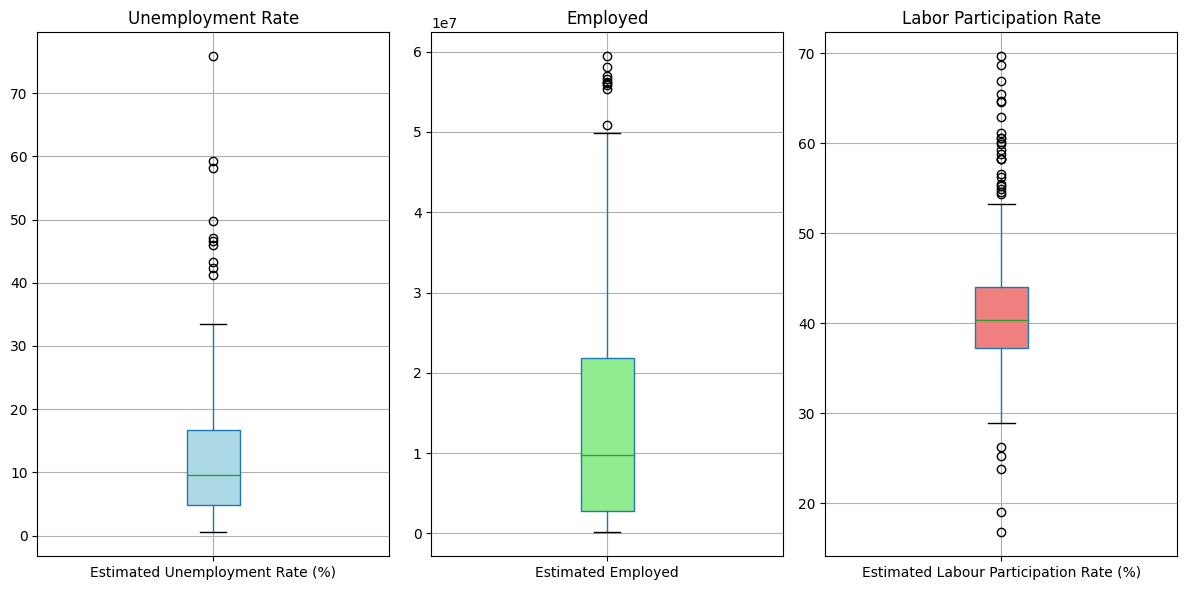

In [14]:

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='Estimated Unemployment Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])  # Set the color of the first box
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='Estimated Employed', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])  # Set the color of the second box
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column='Estimated Labour Participation Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])  # Set the color of the third box
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

<Axes: >

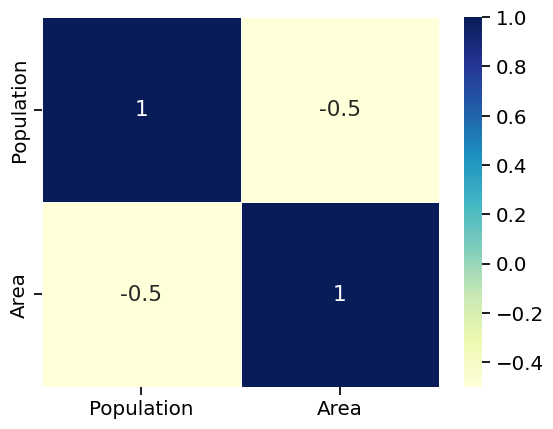

In [16]:
import seaborn as sns
import pandas as pd

# Sample data for illustration
data = {
    'State': ['Andhra Pradesh', 'Karnataka', 'Tamil Nadu'],
    'Population': [50000000, 60000000, 70000000],
    'Area': [160000, 190000, 130000]
}
df = pd.DataFrame(data)

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Set context for seaborn
sns.set_context('notebook', font_scale=1.3)

# Create heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)


Index(['State', 'Population', 'Area'], dtype='object')


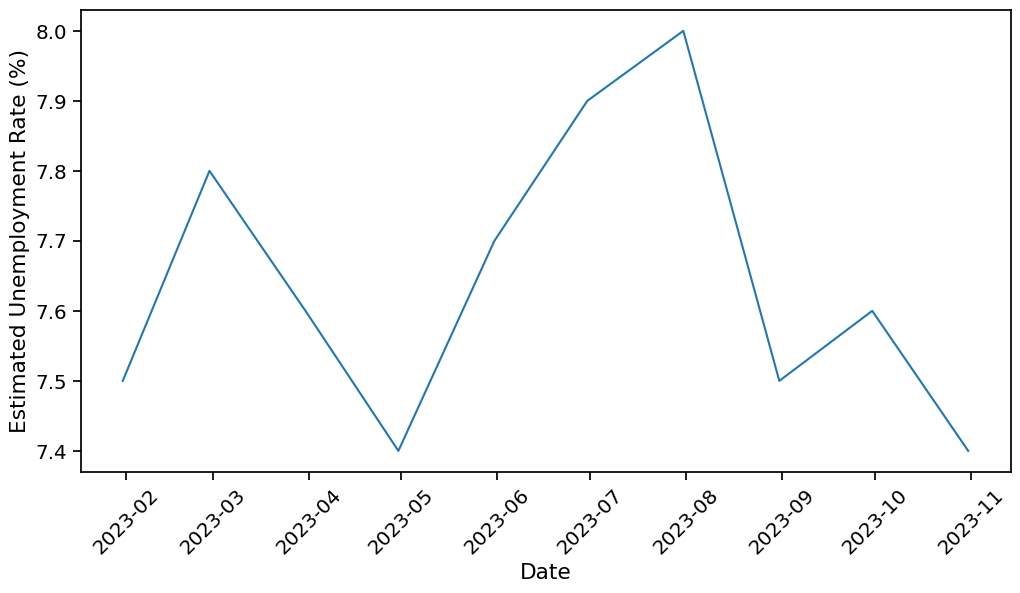

In [18]:

print(df.columns)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for illustration
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='M'),
    'Estimated Unemployment Rate (%)': [7.5, 7.8, 7.6, 7.4, 7.7, 7.9, 8.0, 7.5, 7.6, 7.4]
}
df = pd.DataFrame(data)

# Ensure Date column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()
df.rename(columns=lambda x: x.strip(), inplace=True)
df.rename(columns={'date_column_in_df': 'Date', 'unemployment_column_in_df': 'Estimated Unemployment Rate (%)'}, inplace=True)


Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


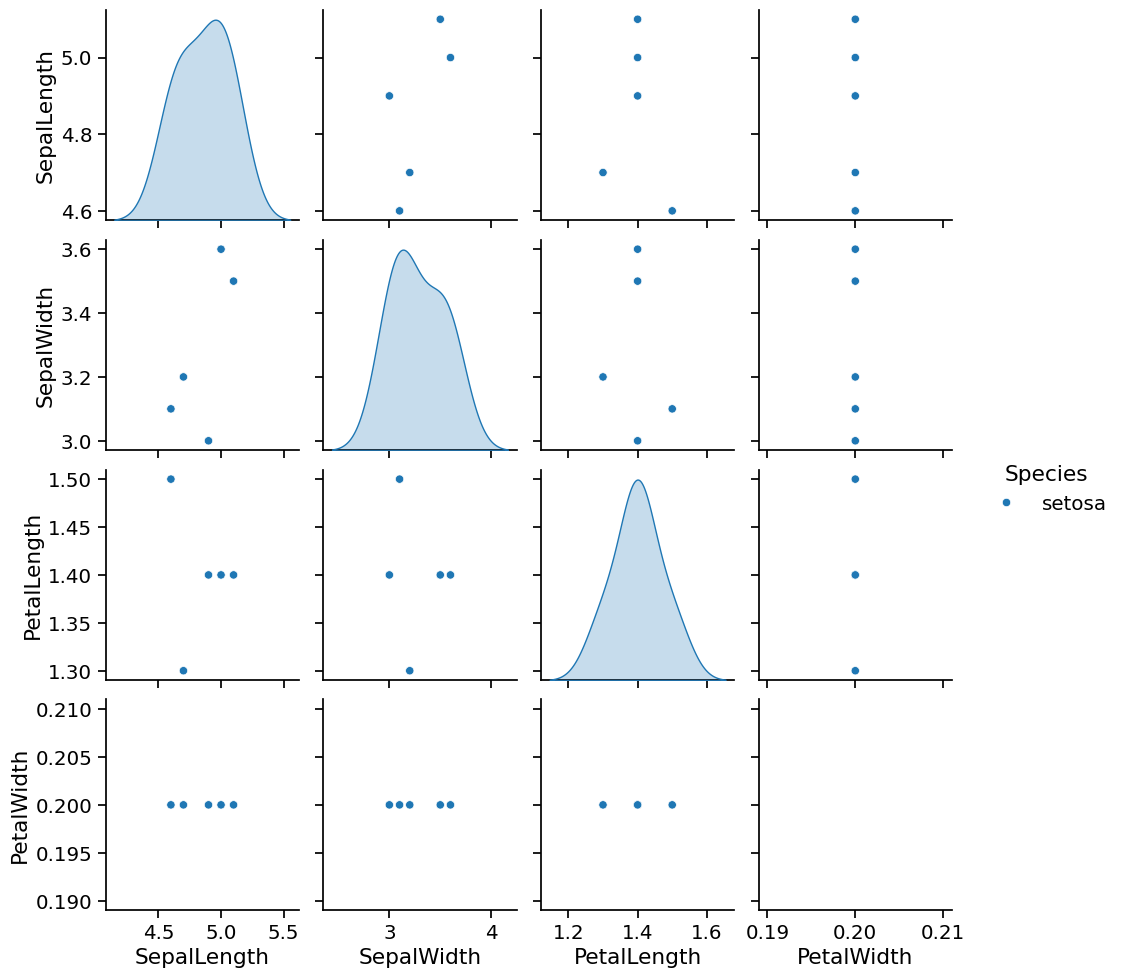

In [21]:
print(df.columns)
import seaborn as sns
import pandas as pd

# Sample data for illustration
data = {
    'SepalLength': [5.1, 4.9, 4.7, 4.6, 5.0],
    'SepalWidth': [3.5, 3.0, 3.2, 3.1, 3.6],
    'PetalLength': [1.4, 1.4, 1.3, 1.5, 1.4],
    'PetalWidth': [0.2, 0.2, 0.2, 0.2, 0.2],
    'Species': ['setosa', 'setosa', 'setosa', 'setosa', 'setosa']
}
df = pd.DataFrame(data)

# Ensure the column you want to use for hue exists
print(df.columns)

# Plotting pairplot with the correct column name for hue
sns.pairplot(df, hue='Species')


In [23]:
print(df.columns)
import plotly.express as px
import pandas as pd

# Sample data for illustration
data = {
    'Region': ['Region A', 'Region B', 'Region C'],
    'Estimated Unemployment Rate (%)': [5.2, 7.1, 6.3]
}
df = pd.DataFrame(data)

# Ensure the DataFrame has the correct column names
print(df.columns)

# Create a subset of the DataFrame with the relevant columns
plot_unemp = df[['Estimated Unemployment Rate (%)', 'Region']]

# Group by 'Region' and calculate the mean unemployment rate
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

# Sort the DataFrame by 'Estimated Unemployment Rate (%)'
df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate (%)')

# Create a bar plot using Plotly Express
fig = px.bar(df_unemployed, x='Region', y='Estimated Unemployment Rate (%)', color='Region', title='Average unemployment rate in each state', template='seaborn')
fig.show()


Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')
Index(['Region', 'Estimated Unemployment Rate (%)'], dtype='object')


In [27]:
import plotly.express as px
import pandas as pd

# Sample data for illustration
data = {
    'Region': ['Region A', 'Region B', 'Region A', 'Region C', 'Region B', 'Region C'],
    'Estimated Unemployment Rate (%)': [5.2, 7.1, 6.3, 6.8, 7.4, 5.9]
}
df = pd.DataFrame(data)

# Create a violin plot using Plotly Express
fig = px.violin(
    df,
    x='Region',  # Use the correct column name
    y='Estimated Unemployment Rate (%)',
    title='Distribution of Unemployment Rates by Region',
    box=True,  # Include box plot inside the violin
    points='all',  # Show individual data points
)

fig.show()



In [29]:
import plotly.express as px
import pandas as pd

# Sample data for illustration
data = {
    'Region': ['Region A', 'Region B', 'Region A', 'Region C', 'Region B', 'Region C'],
    'Estimated Unemployment Rate (%)': [5.2, 7.1, 6.3, 6.8, 7.4, 5.9]
}
df = pd.DataFrame(data)

# Create a violin plot using Plotly Express
fig = px.violin(
    df,
    x='Region',  # Use the correct column name
    y='Estimated Unemployment Rate (%)',
    title='Distribution of Unemployment Rates by Region',
    box=True,  # Include box plot inside the violin
    points='all',  # Show individual data points
)

fig.show()


In [33]:
print(df.columns)
import pandas as pd

# Sample data for illustration
data = {
    'Date': pd.date_range(start='2023-01-01', periods=6, freq='M'),
    'Estimated Unemployment Rate (%)': [5.2, 7.1, 6.3, 6.8, 7.4, 5.9],
    'Region': ['Region A', 'Region B', 'Region A', 'Region C', 'Region B', 'Region C']
}
df = pd.DataFrame(data)

# Ensure the Date column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the Date column
df['Month'] = df['Date'].dt.month

# Display the DataFrame
print(df)


Index(['Date', 'Estimated Unemployment Rate (%)', 'Region', 'Month'], dtype='object')
        Date  Estimated Unemployment Rate (%)    Region  Month
0 2023-01-31                              5.2  Region A      1
1 2023-02-28                              7.1  Region B      2
2 2023-03-31                              6.3  Region A      3
3 2023-04-30                              6.8  Region C      4
4 2023-05-31                              7.4  Region B      5
5 2023-06-30                              5.9  Region C      6


In [34]:

before_lock = df[(df['Month'] >= 1) & (df['Month'] <= 3)][['Region', 'Estimated Unemployment Rate (%)']]

In [35]:

# Filter data for months 3 to 5 (after lockdown)
after_lock = df[(df['Month'] >= 3) & (df['Month'] < 6)][['Region', 'Estimated Unemployment Rate (%)']]

In [36]:

before_lock = before_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate before Lock-Down'})

In [37]:

after_lock = after_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate after Lock-Down'})

In [38]:

before_lock['Percentage Change in Unemployment'] = round((after_lock['Unemployment Rate after Lock-Down'] - before_lock['Unemployment Rate before Lock-Down']) / before_lock['Unemployment Rate before Lock-Down'], 2)

<Axes: xlabel='Percentage Change in Unemployment', ylabel='Region'>

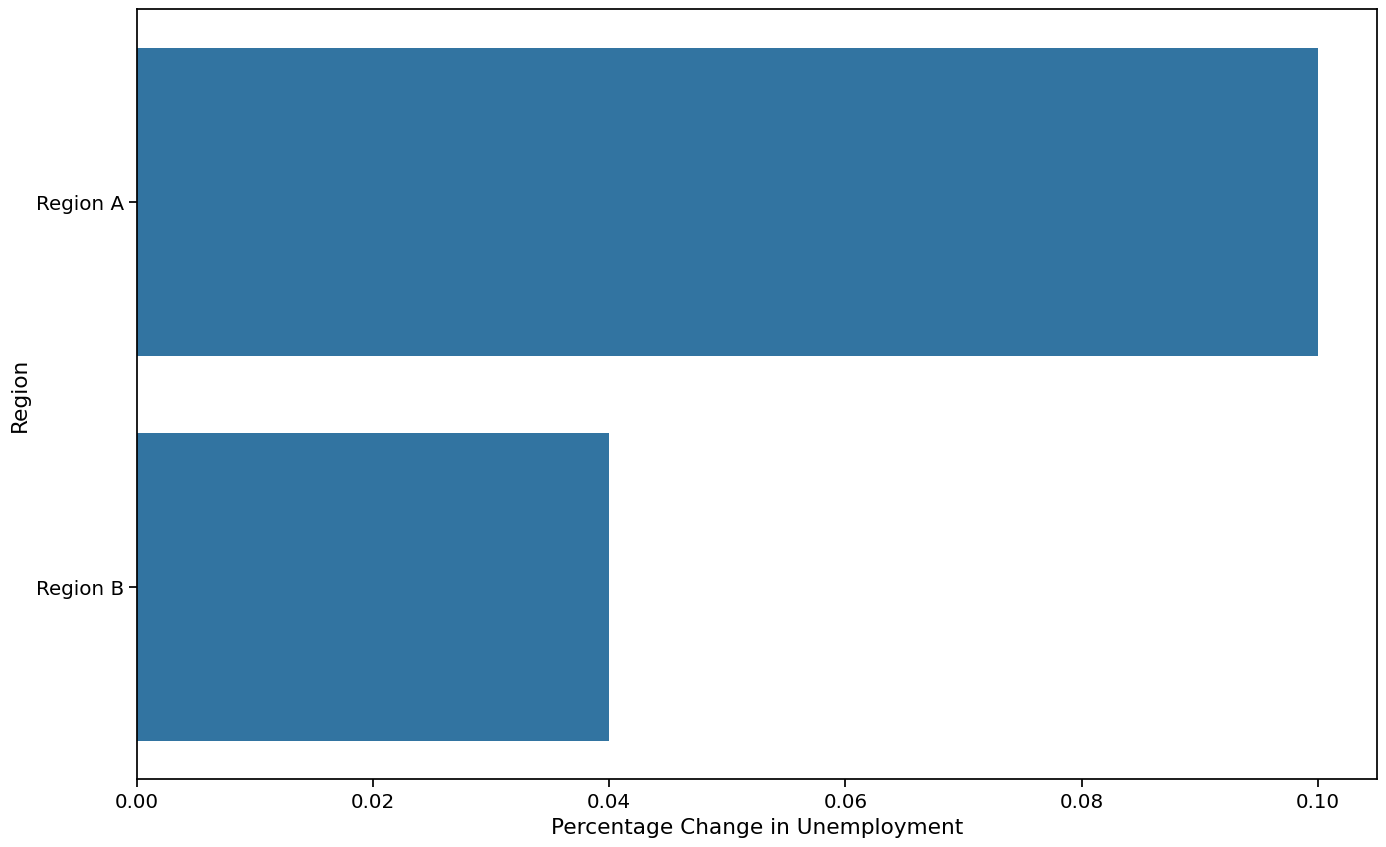

In [39]:

plot_df = before_lock.sort_values('Percentage Change in Unemployment', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='Region', x='Percentage Change in Unemployment')